## Table of Contents

[**Problem Statement**](#Problem)

[**Libraries Used**](#Libraries)

[**Downloading the data-set and Unzip the files**](#Download)

[**Exploratory Data Analysis**](#EDA)

[**K-Means Clustering**](#Clustering)

[**Linear Regression**](#Linear-Regression)

[**Logistics Regression**](#Logistic-Regression)

[**Simulation**](#Simulation)

[**Timing and Efficiency**](#Timing-Efficiency)

<a name="Problem">
### Problem Statement
</a>

Crowdfunding has become one of the most popular funding techniques that start-ups utilize. However the probability of successfully raising funds through crowdfunding is still quite uncertain. If the start-ups can know the factors that impact the probability of successfully collecting the goal amount, they could tweak their campaign or business model and in turn increase their chances of success. That is what we aim to do through this project. We want to understand what factors impact the success and if we can come up with a model that can be used to predict the probability of success.

<a name="Libraries">
### Libraries used in the code 
</a>

Following libraries are present by default in Python 3.6

* sys
* os
* zipfile
* math
* time

Additional libraries installed 

* wget
* pandas
* matplotlib
* numpy
* seaborn
* plotly
* scikit-learn
* statsmodels

In [1]:
# Install the following pip packages in the current Jupyter kernel which are required while running the code.
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install statsmodels

distributed 1.21.8 requires msgpack, which is not installed.


distributed 1.21.8 requires msgpack, which is not installed.


distributed 1.21.8 requires msgpack, which is not installed.


distributed 1.21.8 requires msgpack, which is not installed.


distributed 1.21.8 requires msgpack, which is not installed.


distributed 1.21.8 requires msgpack, which is not installed.


distributed 1.21.8 requires msgpack, which is not installed.


distributed 1.21.8 requires msgpack, which is not installed.


** Note: If you haven't set the Python path in environment variable, the above libraries won't be installed via the code. In such cases please install the required package by using the above command of pip install. Install plotly and wget using** 

*pip install plotly*

*pip install wget*

In [82]:
# Loading the libraries required for Exploratory Data Analysis
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.plotly as py
import plotly
import math
import time

In [3]:
# Setting up credentials to access plotly graphs
plotly.tools.set_credentials_file(username='gupta485', api_key='xG5tpDwCFRmYSOQoALmo') # Created a demo credential for usage.

**Note**: *To run this notebook as standalone on any Python 3.6 standard installation, we have installed the various libraries required for running this code. Also, I am downloading the data-set files required for analysis*

<a name="Download">
### Downloading the data-set
</a>

In [4]:
# Downloading the required zip file and storing it in an output directory
import wget

download_url_list=['https://raw.githubusercontent.com/guptayuvraj/Computing-For-Analytics-Project/master/kickstarter-dataset.zip'] #Providing the input of a file-name
current_directory=os.getcwd()

for download_file in download_url_list:
    wget.download(download_file,current_directory) # Downloading the required zip file and storing it in the current working directory

In [5]:
# Extracting the data-set file from the zip file
import zipfile
file_name_extract = download_url_list[0].split('/')[-1:] #Fetching the file-name
file_name = os.path.abspath(file_name_extract[0])# Providing absolute path of the file to extract
zipfile.ZipFile(file_name).extractall() # Extract file in the absolute path directory.

In [6]:
# Reading the extracted file and storing required columns in a data frame
df=pd.read_csv('ks-projects-201801.csv', sep = ',') # Reading the kickstarter data csv file in Panda data-frame. 
df_country_code = pd.read_csv('2014_world_gdp_with_codes.csv') #Reading the country-codes data in Panda data-frame.

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Setting the parameter to display upto 3 digits after decimal
df.describe() # Provide descriptive statistics of the numerical field in the data-set

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000,378661.000,378661.000,378661.000,374864.000,378661.000,378661.000
mean,1074731191.989,49080.792,9682.979,105.617,7036.729,9058.924,45454.401
std,619086204.323,1183391.259,95636.010,907.185,78639.745,90973.343,1152950.055
min,5971.000,0.010,0.000,0.000,0.000,0.000,0.010
25%,538263516.000,2000.000,30.000,2.000,16.980,31.000,2000.000
50%,1075275634.000,5200.000,620.000,12.000,394.720,624.330,5500.000
75%,1610148624.000,16000.000,4076.000,56.000,3034.090,4050.000,15500.000
max,2147476221.000,100000000.000,20338986.270,219382.000,20338986.270,20338986.270,166361390.710


### Cleaning the dataframe in order to analyse further

In [8]:
df.isnull().sum() #Finding if the data contains null values

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [9]:
df[df['name'].isnull()] #Checking the data corresponding to null Name, this data can be discarded as we are not analyzing on the basis of Name

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.000,2012-01-01 12:35:31,100.000,failed,1,US,100.000,100.000,200000.000
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.000,2012-12-19 23:57:48,196.000,failed,12,GB,317.730,316.050,3224.970
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.000,2016-06-18 05:01:47,0.000,suspended,0,US,0.000,0.000,2500.000
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.000,2011-11-06 23:55:55,220.000,failed,5,US,220.000,220.000,35000.000


**Note : We can discard the null values in name and usd pledged column as we will not be utilizing that column for analysis.**
*Also, we would drop columns from the data-frame while further analyzing the data.*

<a name="EDA"> 
### Exploratory Data Analysis to understand the data better
</a>

### Number of Projects per Year

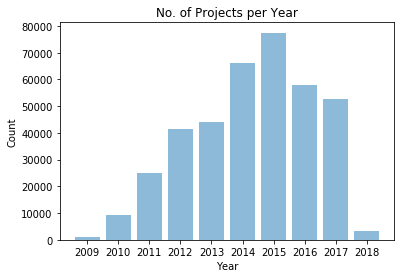

In [10]:
x_axis=(pd.to_datetime(df['deadline'])).dt.year.value_counts().index.values
y_axis=(pd.to_datetime(df['deadline'])).dt.year.value_counts()
ax=plt.bar(x_axis,y_axis, align='center', alpha=0.5)
plt.xticks(x_axis)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('No. of Projects per Year')
plt.show()

#### From the above graph, we can infer that the number of projects steadily increased till 2015, but there has been a decline in the past 2 years.

### Count of projects distributed across various states present in Kickstarter

In [11]:
# Using plotly library to create a pie chart with further customizations
import plotly.graph_objs as go

cmap = plt.get_cmap('Spectral') # Using one of the various colormaps available 
colors = [cmap(i) for i in np.linspace(0, 1, 12)] # Fetching colors from the color map to show the color of the pie in chart

# Providing parameters to create the pie chart below. Parameters such as labels : using the name of index of various state values, values : using the count of values per state, marker:  using colors for different slices of pie chart among other customization.
parameters_pie_chart = go.Pie(labels=df.state.value_counts().index, values=df.state.value_counts(), marker=dict(colors=colors
                                                , line=dict(color='#FFF', width=2)), rotation = 100 
                                                , showlegend=True, name='No. of Projects per state on Kickstarter', textinfo='label+value') 

layout = go.Layout(autosize = True,
                   title = 'No. of Projects per state on Kickstarter', showlegend = True) # Providing the title of the pie-chart and setting autosize as true

pie_chart_figure = go.Figure(data = [parameters_pie_chart], layout = layout) # Creating the object to plot the pie chart with data input as the parameters and layout configuration

# The below pie-chart is interactive, you can hover to get the state name, the count of projects per state and percentage as a whole. You can even download the pie-chart as an image.
py.iplot(pie_chart_figure) # Plotting the pie chart 

*The above graph is interactive, you can hover above in the graph to get additional information*

### No. of Projects per Category

In [12]:
data = [go.Bar(
            x=df.main_category.value_counts().index,
            y=df.main_category.value_counts()
    )]

layout = go.Layout(autosize = True,
                   title = 'No. of Projects per Category on Kickstarter', xaxis=dict(title='Categories'), yaxis=dict(title='No. of Projects'))

bar_chart = go.Figure(data =data, layout = layout)
py.iplot(bar_chart)

*The above graph is interactive, you can hover above in the graph to get additional information*

### Success rate of Projects per Year

In [13]:
df['deadline_year']=[d.split('-')[0] for d in df.deadline]
df['launched_year']=[d.split('-')[0] for d in df.launched]
df['launched_month']=[d.split('-')[1] for d in df.launched]

dfSF = df[(df['state'] == 'successful') | (df['state'] == 'failed')]
success_rate_year = (dfSF[dfSF['state'] == 'successful'].groupby(dfSF.deadline_year)['deadline'].count() / dfSF.groupby(dfSF.deadline_year)['deadline'].count()) * 100
failed_rate_year = (dfSF[dfSF['state'] == 'failed'].groupby(dfSF.deadline_year)['deadline'].count() / dfSF.groupby(dfSF.deadline_year)['deadline'].count()) * 100

success_rate_year_list=success_rate_year.tolist()
failed_rate_year_list=failed_rate_year.tolist()
year_sorted_list=success_rate_year.index.values

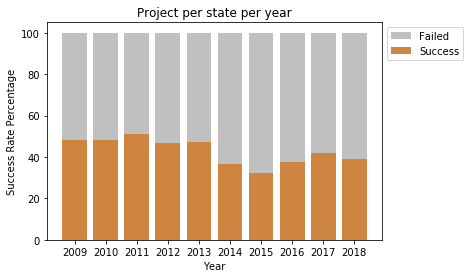

In [14]:
data_values = [x for x, _ in enumerate(year_sorted_list)]

plt.bar(data_values, failed_rate_year_list, width=0.8, label='Failed', color='silver', bottom=success_rate_year_list)
plt.bar(data_values, success_rate_year_list, width=0.8, label='Success', color='#CD853F')

plt.xticks(data_values, year_sorted_list)
plt.ylabel("Success Rate Percentage")
plt.xlabel("Year")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.title("Project per state per year")

plt.show()

**Even though the number of projects have increased on Kickstarter, the success rate has declined. This might be because of the increasing competititon.**

### Analysis to identify factors or trends that differentiate a successful project from an unsuccessful project

In [15]:
success_rate_month = ((dfSF[dfSF['state'] == 'successful'].groupby(dfSF.launched_month)['launched'].count()) / df.groupby(df.launched_month)['launched'].count())*100
failed_rate_month = ((dfSF[dfSF['state'] == 'failed'].groupby(dfSF.launched_month)['launched'].count()) / df.groupby(df.launched_month)['launched'].count())*100

success_rate_month_list=success_rate_month.tolist()
failed_rate_month_list=failed_rate_month.tolist()
month_sorted_list=success_rate_month.index.values

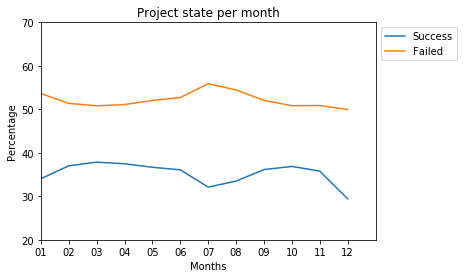

In [16]:
data_values1 = [x for x, _ in enumerate(month_sorted_list)]



plt.plot(data_values1,success_rate_month_list,label='Success')
plt.plot(data_values1,failed_rate_month_list,label='Failed')

plt.xticks(data_values1, month_sorted_list)

plt.title("Project state per month")
plt.ylabel("Percentage")
plt.xlabel("Months")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.axis([0, 12, 20, 70])

plt.show()

# Average pledged amount for successful and non successful project

In [17]:
success_pledged = df[df['state'] == "successful"]['usd_pledged_real'].sum()
fail_pledged = df[df['state'] == 'failed']['usd_pledged_real'].sum()

sum_pledged = df['usd_pledged_real'].sum()

success_projects=df[df['state']=='successful']['state'].count()
fail_projects=df[df['state']=='failed']['state'].count()

In [18]:
# Using plotly library to create a pie chart with further customizations
import plotly.graph_objs as go

cmap = plt.get_cmap('Spectral') # Using one of the various colormaps available 

# Providing parameters to create the pie chart below. Parameters such as labels : using the name of index of various state values, values : using the count of values per state, marker:  using colors for different slices of pie chart among other customization.
parameters_pie_chart = go.Pie(labels=["Successful", "Failed"], values=[success_pledged/success_projects,fail_pledged/fail_projects], marker=dict(colors=colors
                                                , line=dict(color='#FFF', width=2)), rotation = 100 
                                                , showlegend=True, textinfo='label+percent') 

layout = go.Layout(autosize = False,
                   title = 'Average pledged amount for Successful and Failed project', showlegend = True) # Providing the title of the pie-chart and setting autosize as true

pie_chart_figure = go.Figure(data = [parameters_pie_chart], layout = layout) # Creating the object to plot the pie chart with data input as the parameters and layout configuration

# The below pie-chart is interactive, you can hover to get the average pledged amount per state and percentage as a whole. You can even download the pie-chart as an image.
py.iplot(pie_chart_figure) # Plotting the pie chart 

*The above graph is interactive, you can hover above in the graph to get additional information*

###  Campaign length

In [19]:
# Calculating the length of campaign
df['length_days'] = (pd.to_datetime(df['deadline']) - pd.to_datetime(df['launched'])).dt.days + 1

In [20]:
print('Mean days for failed projects: {0}'
      .format(round(df[df['state'] == 'failed']['length_days'].mean(), 2)))
print('Mean days for successful projects: {0}'
      .format(round(df[df['state'] == 'successful']['length_days'].mean(), 2)))

Mean days for failed projects: 35.17
Mean days for successful projects: 32.16


### The length of campaign which is the number of days a project collects funds from backers is different for a failed project and a successful project. We can notice that the failed projects campaings are on average a bit longer. 

### Analysis regarding Category

### Plot for average amount for each category

In [21]:

pledged_sum = {}
for category in list(set(df['main_category'])): #set in order to show only unique values in main category
    amount = df[df['main_category'] == category]['usd_pledged_real'].sum()
    pledged_sum[category] = amount

# Create dataframe
df_category = pd.Series(pledged_sum)
df_category = pd.DataFrame(df_category)
df_category = df_category.rename(columns = {0:"pledged sum"})
df_category.head()

# Finding number of backers for each category
count_category = {}
for category in list(set(df['main_category'])):
    count = df[df['main_category'] == category]['main_category'].count()
    count_category[category] = count
    
df_category['count'] = pd.Series(count_category)

#Finding average amount pledged for every category
df_category['average amount'] = df_category['pledged sum']/ df_category['count']

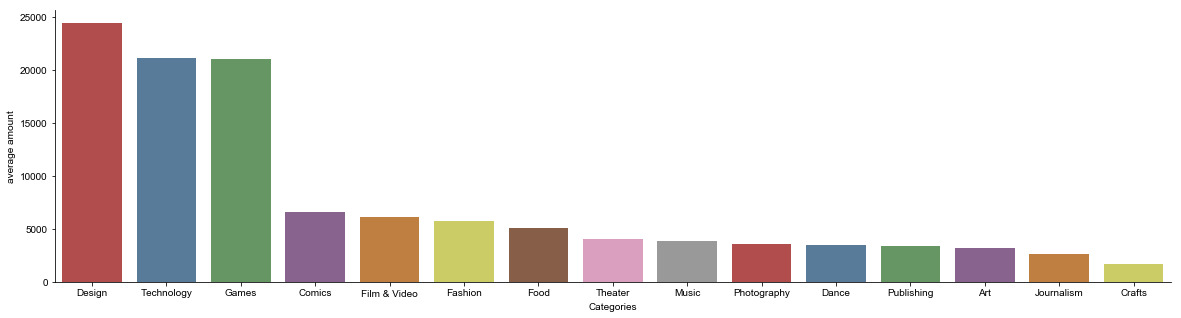

In [22]:
# average amount plot
df_category =df_category.sort_values('average amount',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
plt.xlabel("Categories")
sns.barplot(x=df_category['average amount'].index, y= df_category['average amount'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

### Design, technology and games have the highest funding among all the categories and on an average the backers pay more for these categories. But they are not the most successful

### Successful project % by Main Category

In [23]:
successful_main_category_pct=((df[df['state']=='successful']['main_category'].value_counts()/df['main_category'].value_counts())*100)
successful_main_category_pct_values = successful_main_category_pct.sort_values(ascending=False)
successful_main_category_pct_header = successful_main_category_pct_values.index

data = [go.Bar(
            x=successful_main_category_pct_header,
            y=successful_main_category_pct_values,
            marker = dict(color = 'orange'),
    )]

layout = go.Layout(autosize = True,
                   title = 'Successful % of Projects per Main Category on Kickstarter', xaxis=dict(title='Categories'), yaxis=dict(title='% of Successful Projects'))

bar_chart = go.Figure(data =data, layout = layout)
py.iplot(bar_chart)

*The above graph is interactive, you can hover above in the graph to get additional information*

### Projects from dance, theatre and comics categories are the most successful despite the fact that the projects in these categories do not receive a lot of funds. Therefore we infer that avereage amount of funds a project receives does not completely explain if a project will be successful in collecting the goal amount

##  Success rates of projects  on an interactive world map

In [24]:
#Load data
df_map = df[["ID", "usd_goal_real", "state","country"]]

In [25]:
df_map.head()

,ID,usd_goal_real,state,country
0,1000002330,1533.950,failed,GB
1,1000003930,30000.000,failed,US
2,1000004038,45000.000,failed,US
3,1000007540,5000.000,failed,US
4,1000011046,19500.000,canceled,US


In [26]:
#drop rows that don't have countyry info
df_map = df_map.drop(df_map[df_map["country"] == 'N,0"'].index)

In [27]:
#convert country abbreviates to full name
def country(x):
    if x=="US": return 'United States'
    elif x=="AT": return 'Austria'
    elif x=="AU": return 'Australia'
    elif x=="BE": return 'Belgium'
    elif x=="CA": return 'Canada'
    elif x=="CH": return 'Switzerland'
    elif x=="DE": return 'Germany'
    elif x=="DK": return 'Denmark'
    elif x=="ES": return 'Spain'
    elif x=="FR": return 'France'
    elif x=="GB": return 'United Kingdom'
    elif x=="HK": return 'Hongkong'
    elif x=="IE": return 'Spain'
    elif x=="IT": return 'Italy'
    elif x=="JP": return 'Japan'
    elif x=="LU": return 'Luxembourg'
    elif x=="MX": return 'Mexico'
    elif x=="NL": return 'Netherlands'
    elif x=="NO": return 'Norway'
    elif x=="NZ": return 'New Zealand'
    elif x=="SE": return 'Sweden'
    elif x=="SG": return 'Singapore'
    else: return 'None'
df_map["fullcountry"]=df_map["country"].map(country)

In [28]:
#if value in column is "nan", change it to 0
def replace(x):
    if math.isnan(x):  
        return float(0)
    else:
        return x

In [29]:
success_country=df_map[df_map['state'] == 'successful']['fullcountry'].value_counts()#number of successful project by country

In [30]:
successrate_country=success_country/df_map.groupby("fullcountry")["country"].count()#calculate successful rate
successrate_country=successrate_country.to_frame()#convert series to dataframe

In [31]:
successrate_country.columns=["successfullrate"]#rename column
successrate_country["fullcountry"]=successrate_country.index
#"successrate_country" is adataframe catains successful rate

In [32]:
#merge df with "successrate_country"
df_country_code=df_country_code.merge(successrate_country,how="left",left_on="COUNTRY",right_on="fullcountry")

In [33]:
df_country_code["successfullrate"]=df_country_code["successfullrate"].map(replace)
df_country_code["successfullrate"]=df_country_code["successfullrate"]*100

In [34]:
data = [ dict(
        type = 'choropleth',
        locations = df_country_code['CODE'],
        z = df_country_code['successfullrate'],
        text = df_country_code['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Successful Rate Percentage'),
      ) ]

layout = dict(
    title = 'Successful Rate of Projects by Countries',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

*The above graph is interactive, you can hover above in the graph to get additional information*

### USA has the largest number of projects that are successful in obtaining the goal amount. On the other hand, Italy has the lowest number of successful projects

<a name="Clustering"> 
## Clustering by utilizing K-means
</a>

### Since our data set has 15 main categories, we will try and group these categories into clusters by considering the parameters "Goal amount" and "Pledged sum"

In [35]:
# to get a list of categories, we use sets in order to consider only unique values
list_cat=list(set(df['main_category']))
#To obtain sum of goal amount for each category
goal_sum = {}
for category in list(set(df['main_category'])): #set in order to show only unique values in main category
    amount = df[df['main_category'] == category]['usd_goal_real'].sum()
    goal_sum[category] = amount
#creating new data frame
df_cluster = pd.Series(goal_sum)
df_cluster = pd.DataFrame(df_cluster) #Create dataframe
df_cluster = df_cluster.rename(columns = {0:"goal sum"}) #Rename the column

In [36]:
#To obtain sum of pledged amount for each category
pledged_sum = {}
for category in list(set(df['main_category'])): #set in order to show only unique values in main category
    amount = df[df['main_category'] == category]['usd_pledged_real'].sum()
    pledged_sum[category] = amount
#creating new data frame
df_cluster1 = pd.Series(pledged_sum)
df_cluster1 = pd.DataFrame(df_cluster1) #Create dataframe
df_cluster1 = df_cluster1.rename(columns = {0:"pledged sum"}) #Rename the column

In [37]:
#data frame to use for clustering
df_cluster['pledged sum']= pd.Series(pledged_sum)

In [38]:
# Importing KMeans libraries
from sklearn.cluster import KMeans

In [39]:
#get one data point (i.e., row) from the dataframe
rel_cols=['goal sum', 'pledged sum']
df_cluster.loc["Film & Video",rel_cols].tolist()

[5253729207.950001, 391555058.31]

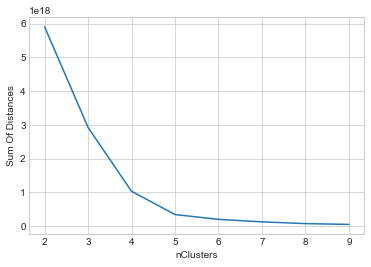

In [40]:
#Determining number of clusters
nClusters=range(2,10)
sumDistances=[]
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(df_cluster[rel_cols])
    sumDistances.append(kmeans.inertia_) #Proxy for SSE
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('nClusters')
plt.ylabel('Sum Of Distances')
plt.show()

### Since there are elbows in the graph at 3,4 and 5 we decided to choose and implement 3 clusters

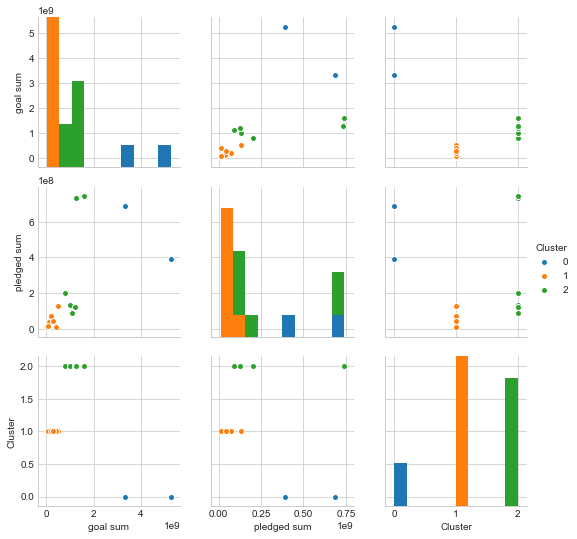

In [41]:
#Implementing KMean-Clustering to cluster multiple categories based on Pledged Sum and Goal Amount.
kmeans=KMeans(n_clusters=3).fit(df_cluster)
df_cluster['Cluster']=kmeans.labels_
g = sns.pairplot(df_cluster,hue='Cluster') #pair plot for pictorial representation of clusters


** From the above pair-plot we can see that categories have been combined in a cluster of 3. The following output showcases different categories are combined 3 types of cluster.**

In [42]:
df_cluster

,goal sum,pledged sum,Cluster
Photography,132224308.230,38501610.580,1
Dance,36128821.970,13010701.870,1
Art,1103557506.720,90680446.110,2
Fashion,511361531.990,130335278.340,1
Music,798091898.600,200318729.450,2
Technology,3331435551.710,688872493.680,0
Crafts,91917213.000,14384280.250,1
Film & Video,5253729207.950,391555058.310,0
Publishing,988805031.870,133575983.280,2
Food,1206472751.020,125806502.350,2


### We have grouped the main categories into 3 clusters. For eg. photography,theatre belong to cluster 2, Music,Design belong to cluster 1 and so on.

<a name="Linear-Regression"> 
## Linear Regression
</a>

**We use linear regression to establish a relationship between goal amount, pledged amount and number of backers. As these variables are numerical in nature, it makes sense to infer whether they have any co-relationship between them or not.**

In [43]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

In [44]:
#Copying the original dataframe to a new dataframe
data_linear=df.copy()

#Dropping the columns which are not required
data_linear=data_linear.drop(columns=['name','goal','pledged','usd pledged'])
data_linear.index=data_linear.ID
data_linear=data_linear.drop(columns=['ID'])


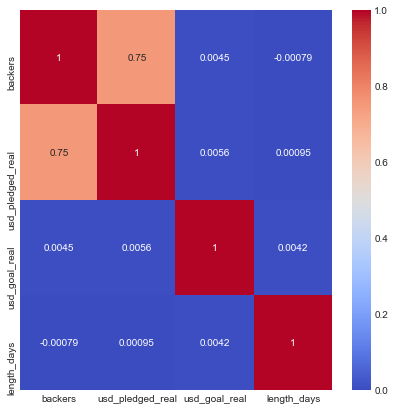

In [45]:
#Draw a heatmap to find the correlation between the key parameters ( backers, USD_pledge_real and USD_goal_real)

plt.figure(figsize=(7,7))
sns.heatmap(data_linear.corr(),cmap='coolwarm',annot=True)
plt.show()

In [46]:
data_linear.backers=data_linear.backers.astype(int)

#After analysing the data, we decided to remove the outlier from the data
data_linear=data_linear.loc[data_linear.backers<=np.percentile(data_linear.backers,99.9),:]
data_linear=data_linear.loc[data_linear.usd_goal_real<=np.percentile(data_linear.usd_goal_real,99.9),:]
data_linear=data_linear.loc[data_linear.usd_pledged_real<=np.percentile(data_linear.usd_pledged_real,99.9),:]

#Restricting our data to Successful and failed projects
data_linear=data_linear.loc[(data_linear['state']=='failed') | (data_linear['state']=='successful')]

#subsetting data where we have backers
backer_data=pd.DataFrame(data_linear[data_linear.backers>0])
backer_data['pledge_ratio']=backer_data.usd_pledged_real/backer_data.backers


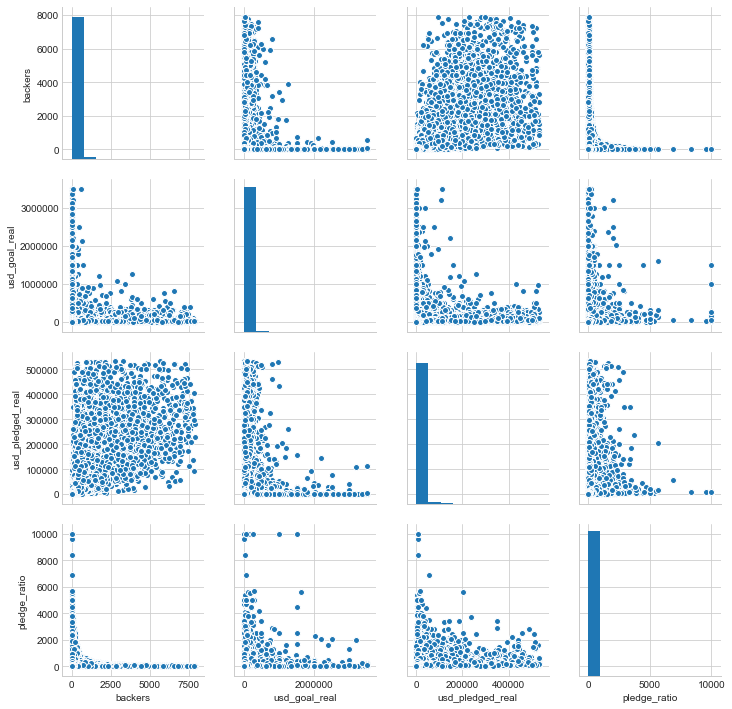

In [47]:
sns.pairplot(backer_data[['backers', 'usd_goal_real', 'usd_pledged_real', 'pledge_ratio']])

*Backers appear to have a positive relationship  with USD_pledged_amount, we will first analyse it by using linear regression*

In [48]:
result = sm.ols(formula="backer_data.backers ~ backer_data.usd_goal_real + backer_data.usd_pledged_real + backer_data.pledge_ratio", data=backer_data).fit()
print(result.summary2())


                       Results: Ordinary least squares
Model:                OLS                   Adj. R-squared:       0.609       
Dependent Variable:   backer_data.backers   AIC:                  3972890.1078
Date:                 2018-07-21 06:28      BIC:                  3972932.4443
No. Observations:     291889                Log-Likelihood:       -1.9864e+06 
Df Model:             3                     F-statistic:          1.514e+05   
Df Residuals:         291885                Prob (F-statistic):   0.00        
R-squared:            0.609                 Scale:                47718.      
------------------------------------------------------------------------------
                              Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                    50.3260   0.4726  106.4809 0.0000 49.3997 51.2523
backer_data.usd_goal_real    -0.0000   0.0000   -7.2446 0.0000 -0.0000 -0.00

**Even though backers have a positive relationship with USD_pledge amount, the relationship is not linear. We will therefore evaluate the log relationship**

In [49]:
non_zero = backer_data[backer_data['usd_pledged_real'] != 0]

X = backer_data['backers'].values
Y = backer_data['usd_pledged_real'].values

X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)

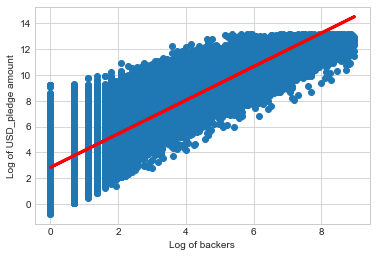

In [50]:
regression = linear_model.LinearRegression()
regression.fit(np.log(X), np.log(Y))

plt.scatter(np.log(X), np.log(Y))
plt.xlabel('Log of backers')
plt.ylabel('Log of USD_pledge amount')

plt.plot(np.log(X), regression.predict(np.log(X)), color='red', linewidth=3)
plt.show()

*There is a linear relationship between log of backers and log of pledge amount where the rate of change is same for both*

In [51]:
result = sm.ols(formula="np.log(backer_data.backers) ~ np.log(backer_data.usd_pledged_real)", data=backer_data).fit()
print(result.summary2())


                           Results: Ordinary least squares
Model:                 OLS                           Adj. R-squared:       0.838      
Dependent Variable:    np.log(backer_data.backers)   AIC:                  656011.4477
Date:                  2018-07-21 06:28              BIC:                  656032.6160
No. Observations:      291889                        Log-Likelihood:       -3.2800e+05
Df Model:              1                             F-statistic:          1.510e+06  
Df Residuals:          291887                        Prob (F-statistic):   0.00       
R-squared:             0.838                         Scale:                0.55410    
--------------------------------------------------------------------------------------
                                      Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------------
Intercept                            -1.3438   0.0038 -355.8939 0.0000 

*From the above linear regression equation, we can infer that there seems to be a relation between the number of backer's and the amount they fund for the project.* **However to predict success based on these factors, we would utilize logistic regression to derive the favourable factors which would significantly affect the success of a product.**

<a name="Logistic-Regression"> 
## Logistic Regression
</a>

**Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.**

In [52]:
from sklearn import preprocessing
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

**The dataset provides the information on startups who have pitched on the Kickstarter.**
**It includes 378,661 records and 15 fields.**

In [53]:
data=df.copy() #Creating a copy of the master data-frame

#Predict variable (desired target):

#state — Will the startup have a successful launch (binary: “1”, means “Yes”, “0” means “No”)

data['state'].unique() #Checking the various values of state

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [54]:
# Filtering the data to get only failed & successful launches 
data=data.loc[(data['state']=='failed') | (data['state']=='successful')]

# Checking the shape of dataframe post filtering
data.shape

(331675, 19)

In [55]:
data.groupby('state').mean()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,length_days
state,,,,,,,,
failed,1074638761.485,67346.846,1426.971,16.422,1133.741,1320.604,63174.742,35.173
successful,1073727308.414,10162.961,24099.779,263.921,17356.034,22670.795,9532.853,32.156


**Observations**

Successful launches have small goal amount

Successful launches get more pledged amount compared to failed launches 

Successful launches have more backers 

**Calculating categorical means for other categorical variables such as category, main category and country to get a more detailed sense of our data.**

In [56]:
data.groupby('category').mean().head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,length_days
category,,,,,,,,
3D Printing,1070278283.178,47421.033,82752.459,272.673,60146.108,76876.211,45830.955,33.690
Academic,1095291461.732,59660.049,4476.899,47.981,1631.837,3357.814,56981.241,34.584
Accessories,1069988968.584,18716.091,9041.776,90.173,4880.944,7279.239,14201.602,31.100
Action,1070996525.201,375217.768,4252.099,54.155,3378.630,4255.229,351325.126,35.182
Animals,1164132171.345,8653.738,2838.373,43.231,2405.708,3111.532,7719.283,31.319


In [57]:
data.groupby('main_category').mean().head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,length_days
main_category,,,,,,,,
Art,1075395369.998,40916.308,3880.154,45.422,2738.786,3474.077,39432.141,32.333
Comics,1062186861.382,20883.199,7458.192,145.608,5783.516,7147.216,20192.217,33.847
Crafts,1076182288.586,11002.815,2203.499,29.851,1288.950,1784.832,9954.615,31.447
Dance,1074921610.040,8999.652,3861.714,44.790,3101.018,3612.684,8332.163,32.813
Design,1078731277.122,42462.212,30739.555,274.142,19487.788,27804.649,38236.995,34.139


In [58]:
data.groupby('country').mean().head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,length_days
country,,,,,,,,
AT,1110673440.988,37747.532,16604.741,128.604,6190.081,18870.281,42129.541,34.823
AU,1070940018.131,69311.941,8264.504,90.063,4258.145,6512.738,55530.701,33.214
BE,1100032409.296,31735.987,6998.398,61.860,4202.454,7807.063,35489.433,35.040
CA,1078053786.769,54997.416,8582.204,99.522,5295.443,6943.615,44816.032,33.905
CH,1052995827.828,297014.121,18720.619,98.376,7168.521,19004.919,306681.807,35.314


In [59]:
# Dropping a few columns which are not relevant which is obatined throgh the EDA carried out above
data=data.drop(columns=['name','pledged','usd pledged','currency'])

**Changing the datatype of columns containing dates to get the duration of each campaign**

In [60]:
data['launched'] = pd.to_datetime(data['launched']) #Changing the column to datetime format
data['launched']=pd.DatetimeIndex(data['launched']).normalize() #Normalizing the column for uniform formatting
data['deadline'] = pd.to_datetime(data['deadline']) #Changimg the column to datetime format
data['duration'] = data['deadline'] - data['launched'] # Calculating the duration of campaign

# Changing the target variable(State) to binary values
data.state[data['state'] == 'failed'] = 0.0
data.state[data['state'] == 'successful'] = 1.0

data.state=pd.to_numeric(data.state)

# Based on the EDA we have filtered the data for columns which have maximum impact on the outcome
data = data[['state', 'main_category', 'country', 'usd_goal_real','launched_month']]

# Carrying out Log Transformations on the USD Goal Real column as the data in this column has Wide Distribution of data
data['usd_goal_real'] = np.log(data['usd_goal_real'])

C:\Users\Yuvraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Yuvraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Creating dummy variables

In [61]:
data = pd.get_dummies(data)
data_size_time=data.copy() #Create a new data-frame which would be used to time the code when data-size increases

**Final Data Columns are defined below** 

In [62]:
data_final_vars=data.columns.values.tolist()
y=['state']
X=[i for i in data_final_vars if i not in ['state']]

## Feature Selection

**Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. In this process, each variable is chosen and checked whether the variable is significant in comparison to the dependent variable. If the chosen variable is significant, it is kept in the regression model. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.**

In [66]:
from sklearn import datasets
from sklearn.feature_selection import RFE

start=time.time() #Using start time to time the entire piece of RFE code
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data[X], data[y] )
print(rfe.support_)

print("Duration: "+str(time.time()-start)) #Prints the duration of the time taken to run the code


C:\Users\Yuvraj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[False False  True  True  True False  True False  True False  True False
  True  True  True  True False False False False False False  True False
  True  True  True False  True False False False  True False False False
 False  True  True False False False False False False False False False
 False False False]
Duration: 55.90792155265808


** On the basis of the above support matrix, we get to know which of the variables are important to measure the success.**

In [67]:
#Introdoucing an intercept in the dataset
data['intercept'] = 1

**The RFE has helped us select the following features**

In [68]:
cols = ['intercept','usd_goal_real',
'main_category_Comics',
'main_category_Crafts',
'main_category_Fashion',
'main_category_Food',
'main_category_Music',
'main_category_Photography',
'main_category_Publishing',
'main_category_Technology',
'main_category_Theater',
'country_CA',
'country_GB',
'country_US',
'launched_month_01',
'launched_month_06',
'launched_month_07',
'launched_month_08',
'launched_month_12']


In [69]:
#Creating the data sets which will feed into the model
X=data[cols]
y=data['state']

## Implementing the model

In [70]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.628549
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:               331675
Model:                          Logit   Df Residuals:                   331656
Method:                           MLE   Df Model:                           18
Date:                Sat, 21 Jul 2018   Pseudo R-squ.:                 0.06820
Time:                        06:33:04   Log-Likelihood:            -2.0847e+05
converged:                       True   LL-Null:                   -2.2373e+05
                                        LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                     1.8418      0.025     73.115      0.000       1.

**The p-values for all of the variables are smaller than 0.05, therefore, all of them are significant to the model.**

*Now let us try to fit our regression model by training on a subset of the complete data and testing the results*

## Logistic Regression Model Fitting

In [71]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #Taken test size as 30% of the complete data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting the test set results and calculating the accuracy

In [72]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 64.21


*This showcases that the accuracy of the logistic regression classifier we created to predict the success of a product by analyzing the various independent variables is 64%.*

**Let's validate whether the accuracy predicted by our model is actually 64% or not as per the following methods**

## Cross Validation

**Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.**

In [73]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()*100))

10-fold cross validation average accuracy: 64.004


*The average accuracy of 10-fold cross validation method denotes that 64% of the time we are not overfitting the data. Also, this accuracy is similar to the overall logisitic regression which shows that we have a strong model and prediction can be done fairly well with approximately 64% accuracy.*

## Confusion Matrix

**Compute confusion matrix to evaluate the accuracy of a classification**

**By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.**

**Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.**

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[48342 11160]
 [24452 15549]]


*The confusion matrix denotes that overall 63,891 predictions (Sum of 48,342 & 15,549) were correct and 35,612 (Sum of 24,452 & 11,160) predictions were incorrect. This showcases that the predictions were accurate 64.3% of the times.*

**Both the validation methods reiterates the fact that our prediction model predicts with an accuracy of 64%**

## Computing precision, recall, F-measure and support to test model

**The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.**

**The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.**

**The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.**

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.66      0.81      0.73     59502
        1.0       0.58      0.39      0.47     40001

avg / total       0.63      0.64      0.62     99503



**Interpretation: Of the entire test set, 63% of the projects were which had successful launch.**

## ROC Curve

**ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. Translating to a larger area under the curve (AUC) is usually better.**

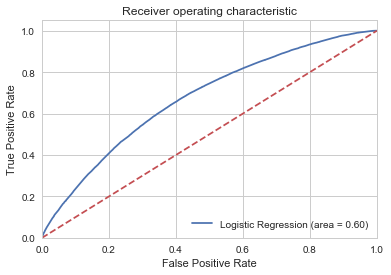

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

*After getting our regression model in place, let's simulate the success probability wherein we would be varying the goal for a particular category and observe the trend in increase of goal amount and the probability of the product being successfully funded.*

<a name="Simulation"> 
## Simulating the output
</a>

**Here we will simulate the trend in probability where we change the Goal amount**

We have fixed following variable to observe the trend

Country = US

Launch Month = January

Category Considered = Music

In [77]:
# User defined function to calculate probability for a goal using the Logistic regression equation
def mysimulation(g):
    goal = g *1000
    p = -0.3348 - 0.00001569*goal+0.2596+0.4002-0.1489
    t = np.exp(p)/(1+np.exp(p))
    
    return t

In [78]:
# Simulating the model result by varying the goal amount 
predict=[]
goalamt=[]

for i in range(10000):
    j = np.random.randint(1, 200)
    predict.append(mysimulation(j))
    goalamt.append(j*1000)

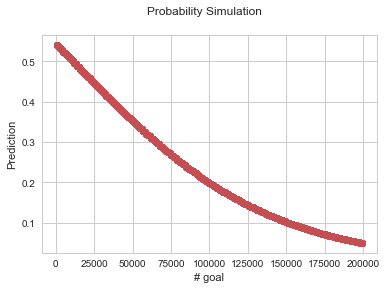

In [79]:
# Plotting the results of Simulation 
x= goalamt
y= predict
fig = plt.figure()
plt.plot(x,y,'ro')
plt.suptitle('Probability Simulation')
plt.xlabel('# goal')
plt.ylabel('Prediction')
plt.show()

*The above graph shows that the higher your goals, the lesser is your probability of raising money successfully. This re-iterates the fact that we had seen in Exploratory Data Analysis that successful funded projects have a lower goal amount.*

<a name="Timing-Efficiency"> 
### Relationship between Time taken to get regression results when data size increases i.e. Number of observations increases.
</a>

In [80]:
data = data.reset_index(drop=True)
data.head() #Observing the data 

,state,usd_goal_real,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,launched_month_04,launched_month_05,launched_month_06,launched_month_07,launched_month_08,launched_month_09,launched_month_10,launched_month_11,launched_month_12,intercept
0,0.000,7.336,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.000,10.309,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.000,10.714,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.000,8.517,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.000,10.820,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Optimization terminated successfully.
         Current function value: 0.628424
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629970
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629883
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629788
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629652
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629744
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629500
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629511
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629046
  

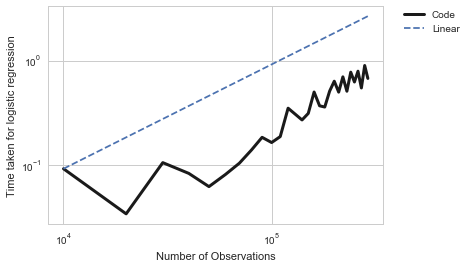

Duration: 11.502241849899292


In [81]:
start_1=time.time()
#Changing the number of observations

data['intercept'] = 1
x=range(10000,300000,10000) #Providing the starting data size at 10,000 observations with maximum data size of 300,000 observations. 

Time=[]

for i in x:
    
     
    data_subsetted=data.loc[:i,]
    start=time.time()
    X=data_subsetted[cols]
    y=data_subsetted['state']

    logit_model=sm.Logit(y,X)
    result=logit_model.fit() #Running logistic model
    Time.append(time.time()-start)


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog (x, Time, 'k-',linewidth=3,label="Code")

linearTime = [Time[0]/x[0]*m for m in x] #Calculating Linear time as a benchmark timing with our code

ax1.loglog (x, linearTime, 'b--',label="Linear")

plt.xlabel('Number of Observations')
plt.ylabel('Time taken for logistic regression')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

print("Duration: "+str(time.time()-start_1))


Inorder to check how increase in datasize would affect the time taken, we have taken the most important part of the code which generates the result of the logistic regression model.
Since the dataset which we have taken is already 330k rows, we started by subsetting the data to 10k and gradually increased it to 300k with evenly spaced interval of 10k and calculated the time taken for each subset of data.
With this we plotted a graph in which on the Y-Axis we plotted the time taken for running the logistic regression and on the X-Axis we plotted the number of observations. On plotting the log of time's taken vs log of number of observations, we observed that the relationship is apporximately linear increasing.

**We monitored the time taken vs number of observations and saw the impact of time on most important part of the code when size becomes 30 times from initial size of 10K observations till 300K observations.**